**Importing Libraries**

In [1]:
#for numerical operations
import numpy as np

#for dataframe operations
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for machine learning algorithms
import sklearn
import imblearn


**Reading the Dataset**

In [2]:
#lets import the dataset using the read_csv function
data = pd.read_csv('/content/loan_data_set.csv')

#lets check the shape of the dataset
data.shape

(614, 13)

In [3]:
#lets check the column name present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
#lets check the head of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Descriptive Statistic**

In [5]:
#for numerical variables
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#for categorical variable
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Data Cleaning**

In [8]:
#checking no.of missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#using mode values to impute categorical columns

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#using median values to impute the numerical columns

data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].median())

In [10]:
#lets check if there is any null value left or not
data.isnull().sum().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


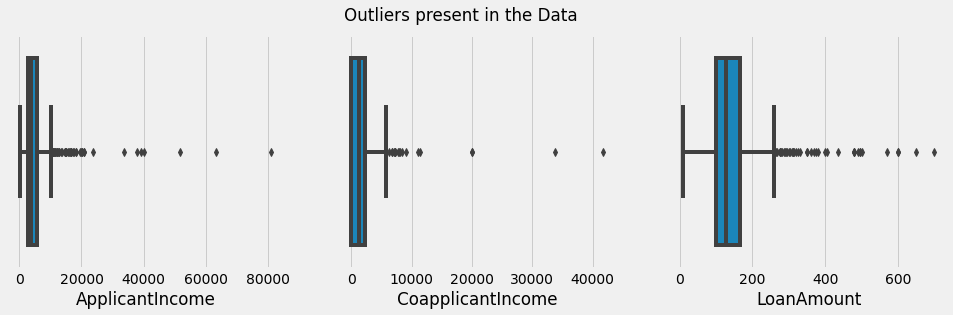

In [11]:
#lets Visualize the outliers using box plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers present in the Data')
plt.show()

In [12]:
#lets remove the outliers from the data

#lets check the shape before removing the outliers
print('Before Removing Outliers',data.shape)

#lets filter the customer having more than 25000 income
data = data[data['ApplicantIncome'] < 25000]

#lets check the shape after removing outliers
print('After Removing outliers',data.shape)

Before Removing Outliers (614, 13)
After Removing outliers (607, 13)


In [13]:
#lets remove the outliers from the co-applicants Income

#lets check the shape before removing the outliers
print('Before Removing Outliers',data.shape)

#lets filter the customer having more than 10000 income
data = data[data['CoapplicantIncome'] < 10000]

#lets check the shape after removing outliers
print('After Removing outliers',data.shape)

Before Removing Outliers (607, 13)
After Removing outliers (601, 13)


In [14]:
#lets remove the outliers from the loan Amount

#lets check the shape before removing the outliers
print('Before Removing Outliers',data.shape)

#lets filter the customer having more than 400 loan amount
data = data[data['LoanAmount'] < 400]

#lets check the shape after removing outliers
print('After Removing outliers',data.shape)

Before Removing Outliers (601, 13)
After Removing outliers (590, 13)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

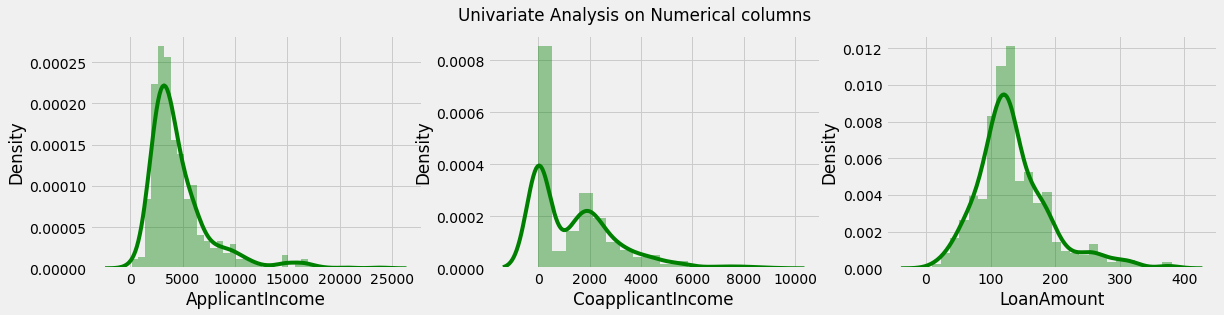

In [19]:
#univariate analysis on numerical columns

plt.rcParams['figure.figsize'] = (18,4)
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color = 'green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color = 'green')\

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'],color = 'green')

plt.suptitle('Univariate Analysis on Numerical columns')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

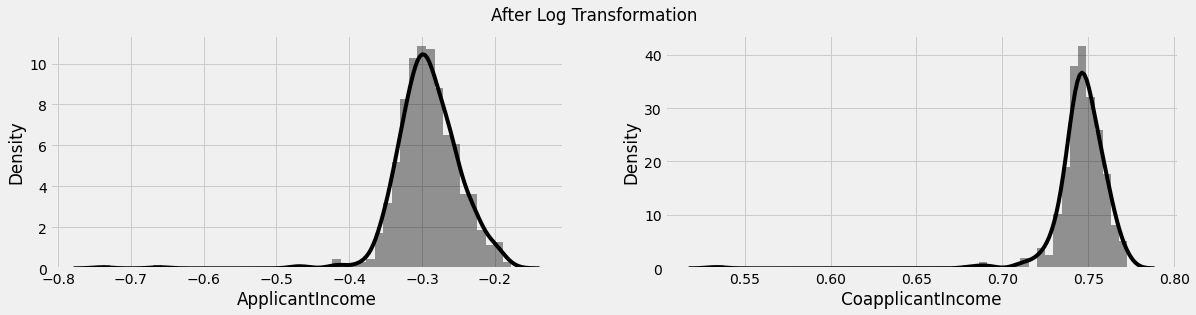

In [23]:
#lets remove the skewness from applicant income and coapplicant income, as it can add bias to the data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18,4)

# lets apply log transformation to remove skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

#lets plot them and check whether the skewness is removed or not
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'], color = 'black')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color = 'black')

plt.suptitle('After Log Transformation')
plt.show


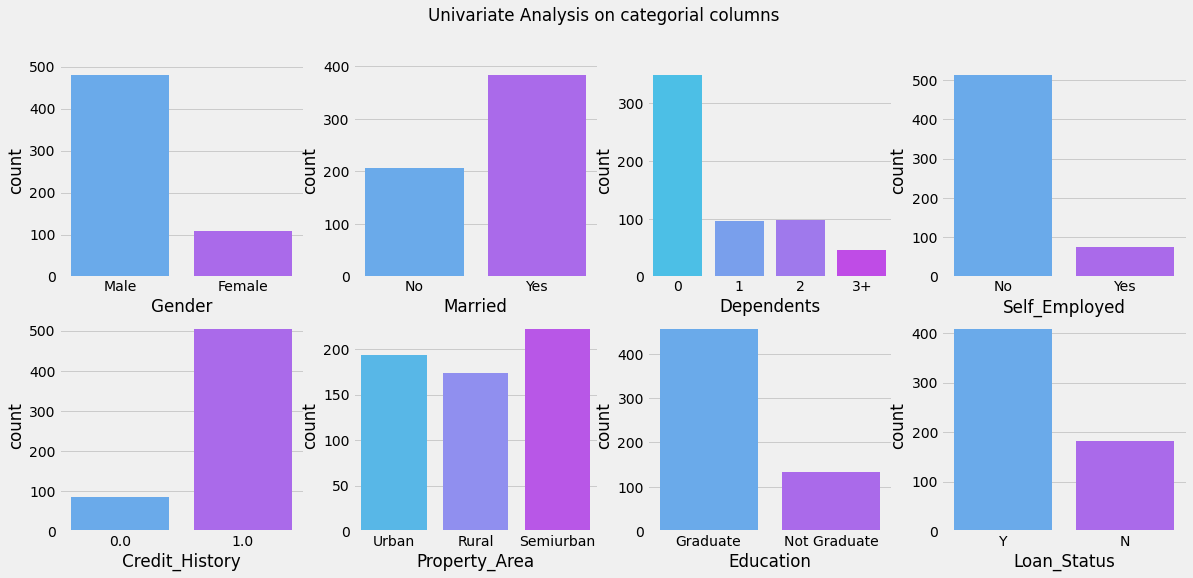

In [25]:
##Univariate Analysis on categorical columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2,4,4)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2,4,5)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2,4,6)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2,4,7)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'], palette = 'cool')

plt.suptitle('Univariate Analysis on categorial columns')
plt.show()

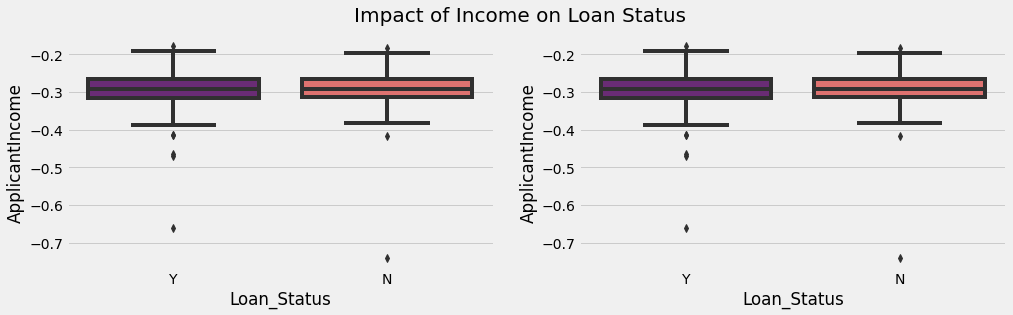

In [32]:
#lets check the impact of income of applicamnt and coapplicant on loan status

plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')

plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

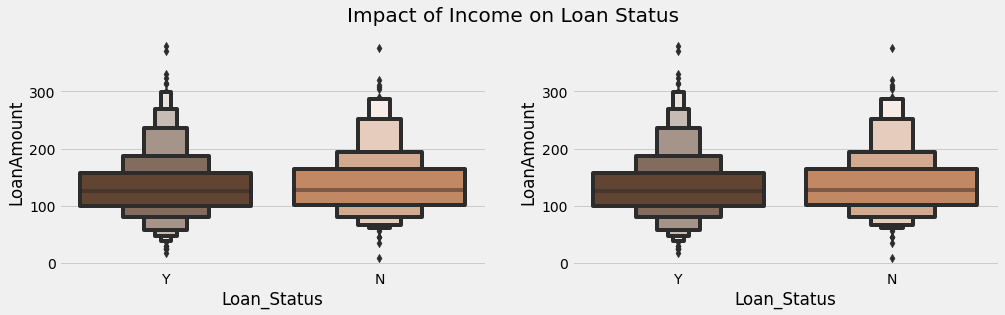

In [36]:
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette = 'copper')

plt.subplot(1,2,2)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette = 'copper')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

**Comparing Categorical Data with Target Columns**

In [40]:
print('Impact of Marriage on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print('Impact of Dependents on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print('Impact of Education on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print('Impact of Employment on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print('Impact of Property on Loan Status')
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
print('\n')

Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


